In [302]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)
import numpy as np

2.0.0


In [303]:
from sklearn.preprocessing import MinMaxScaler

In [304]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\학교\4학년 1학기\전력경제\rnn.xlsx')
dataset=emp1.parse('Sheet1')
data = dataset.dropna()
data

,date,Adj Load,최고기온,최저기온,평균기온,운량,일조시간,평일
0,2010-02-22-0,50423,11.0,3.5,6.5,4.5,5.7,0
1,2010-02-22-1,47984,11.0,3.5,6.5,4.5,5.7,0
2,2010-02-22-2,46810,11.0,3.5,6.5,4.5,5.7,0
3,2010-02-22-3,46665,11.0,3.5,6.5,4.5,5.7,0
4,2010-02-22-4,47591,11.0,3.5,6.5,4.5,5.7,0
...,...,...,...,...,...,...,...,...
691,2010-03-22-19,60485,5.0,-0.1,2.1,8.8,0.0,0
692,2010-03-22-20,58475,5.0,-0.1,2.1,8.8,0.0,0
693,2010-03-22-21,56964,5.0,-0.1,2.1,8.8,0.0,0
694,2010-03-22-22,58072,5.0,-0.1,2.1,8.8,0.0,0


In [305]:
data_training = data[data['date']<'2010-03-19-0'].copy()
data_test = data[data['date']>='2010-03-19-0'].copy()

In [306]:
data_training = data_training.drop(['date'], axis = 1)

In [307]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training #shape(3805,5)

array([[0.37175613, 0.60344828, 0.54347826, ..., 0.45      , 0.51818182,
        0.        ],
       [0.25476088, 0.60344828, 0.54347826, ..., 0.45      , 0.51818182,
        0.        ],
       [0.19844582, 0.60344828, 0.54347826, ..., 0.45      , 0.51818182,
        0.        ],
       ...,
       [0.72231016, 0.23563218, 0.08695652, ..., 0.11      , 1.        ,
        1.        ],
       [0.77603492, 0.23563218, 0.08695652, ..., 0.11      , 1.        ,
        1.        ],
       [0.79311172, 0.23563218, 0.08695652, ..., 0.11      , 1.        ,
        1.        ]])

In [308]:
X_train = []
y_train = []

In [309]:
for i in range(24, data_training.shape[0]):
    X_train.append(data_training[i-24:i])
    y_train.append(data_training[i, 0])

In [310]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [311]:
X_train.shape

(576, 24, 7)

In [312]:
y_train

array([0.57787691, 0.45071233, 0.39012808, 0.36883005, 0.40634144,
       0.47978126, 0.56118386, 0.61677939, 0.78107162, 0.8629539 ,
       0.86688732, 0.82577829, 0.58943733, 0.65558594, 0.66599511,
       0.62795606, 0.6271406 , 0.63160167, 0.73286324, 0.75891015,
       0.68897203, 0.63894085, 0.70115604, 0.71458723, 0.51671703,
       0.38451576, 0.324699  , 0.31491342, 0.36096321, 0.44255768,
       0.51964311, 0.56698806, 0.70600086, 0.77047057, 0.77699429,
       0.7402504 , 0.53000432, 0.61442893, 0.64004413, 0.6254617 ,
       0.6263731 , 0.60824099, 0.66637886, 0.66407637, 0.59792776,
       0.56933851, 0.61298988, 0.62320718, 0.41392047, 0.27658656,
       0.21605027, 0.20516141, 0.25845445, 0.34048064, 0.40543004,
       0.44145441, 0.59620089, 0.69602341, 0.75464096, 0.75646376,
       0.6074735 , 0.70374634, 0.72859404, 0.70489759, 0.702739  ,
       0.69602341, 0.71449129, 0.68710126, 0.60406773, 0.55499592,
       0.61649158, 0.62507795, 0.4181417 , 0.27035065, 0.20511

In [313]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [314]:
regressior = Sequential()

regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 7)))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 300, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.3))


regressior.add(LSTM(units = 300, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 100, activation = 'relu'))
regressior.add(Dropout(0.3))

regressior.add(Dense(units = 1))

In [315]:
regressior.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 24, 50)            11600     
_________________________________________________________________
dropout_60 (Dropout)         (None, 24, 50)            0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 24, 300)           421200    
_________________________________________________________________
dropout_61 (Dropout)         (None, 24, 300)           0         
_________________________________________________________________
lstm_64 (LSTM)               (None, 24, 300)           721200    
_________________________________________________________________
dropout_62 (Dropout)         (None, 24, 300)           0         
_________________________________________________________________
lstm_65 (LSTM)               (None, 100)             

In [316]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [317]:
regressior.fit(X_train, y_train, epochs=30, batch_size=16)

Train on 576 samples
Epoch 1/30
576/576 [==============================] - 12s 21ms/sample - loss: 0.1792
Epoch 2/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0461
Epoch 3/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0439
Epoch 4/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0417
Epoch 5/30
576/576 [==============================] - 7s 12ms/sample - loss: 0.0372
Epoch 6/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0366
Epoch 7/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0349
Epoch 8/30
576/576 [==============================] - 6s 10ms/sample - loss: 0.0326
Epoch 9/30
576/576 [==============================] - 7s 12ms/sample - loss: 0.0311
Epoch 10/30
576/576 [==============================] - 7s 12ms/sample - loss: 0.0309
Epoch 11/30
576/576 [==============================] - 6s 11ms/sample - loss: 0.0263
Epoch 12/30
576/576 [==============================]

###### data_test

In [318]:
data_training = data[data['date']<'2010-03-19-0'].copy()

In [319]:
past_60_days = data_training.tail(60)


In [320]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date'], axis = 1)
df

,Adj Load,최고기온,최저기온,평균기온,운량,일조시간,평일
0,55773,3.9,-1.0,0.7,2.0,9.7,1
1,57896,3.9,-1.0,0.7,2.0,9.7,1
2,58593,3.9,-1.0,0.7,2.0,9.7,1
3,58070,3.9,-1.0,0.7,2.0,9.7,1
4,58070,3.9,-1.0,0.7,2.0,9.7,1
...,...,...,...,...,...,...,...
151,60485,5.0,-0.1,2.1,8.8,0.0,0
152,58475,5.0,-0.1,2.1,8.8,0.0,0
153,56964,5.0,-0.1,2.1,8.8,0.0,0
154,58072,5.0,-0.1,2.1,8.8,0.0,0


In [321]:
inputs = scaler.transform(df)
inputs.shape #shape (156,6)

(156, 7)

In [323]:
X_test = []
y_test = []

for i in range(24, inputs.shape[0]):
    X_test.append(inputs[i-24:i])
    y_test.append(inputs[i, 0])

In [324]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((132, 24, 7), (132,))

In [325]:
y_pred = regressior.predict(X_test)

In [326]:
scaler.scale_

array([4.79685326e-05, 5.74712644e-02, 7.24637681e-02, 7.35294118e-02,
       1.00000000e-01, 9.09090909e-02, 1.00000000e+00])

In [327]:
scale = 1/4.79685326e-05
scale

20847.000018507966

In [328]:
y_pred = y_pred*scale
y_test = y_test*scale

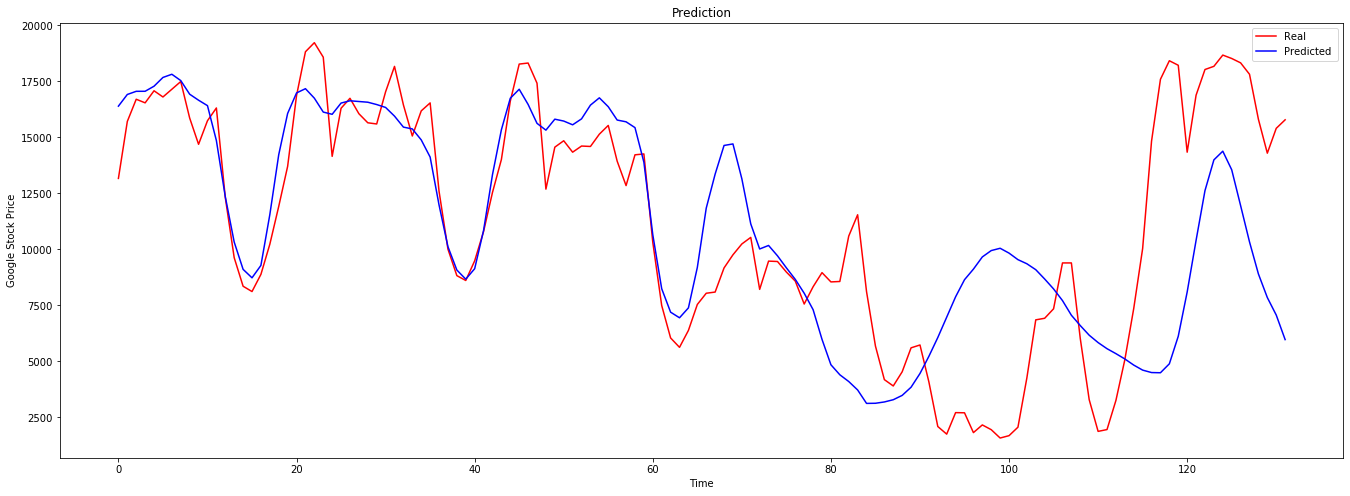

In [329]:
plt.figure(figsize=(23,8))
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(y_pred, color = 'blue', label = 'Predicted ')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [330]:
y_train = y_train*scale

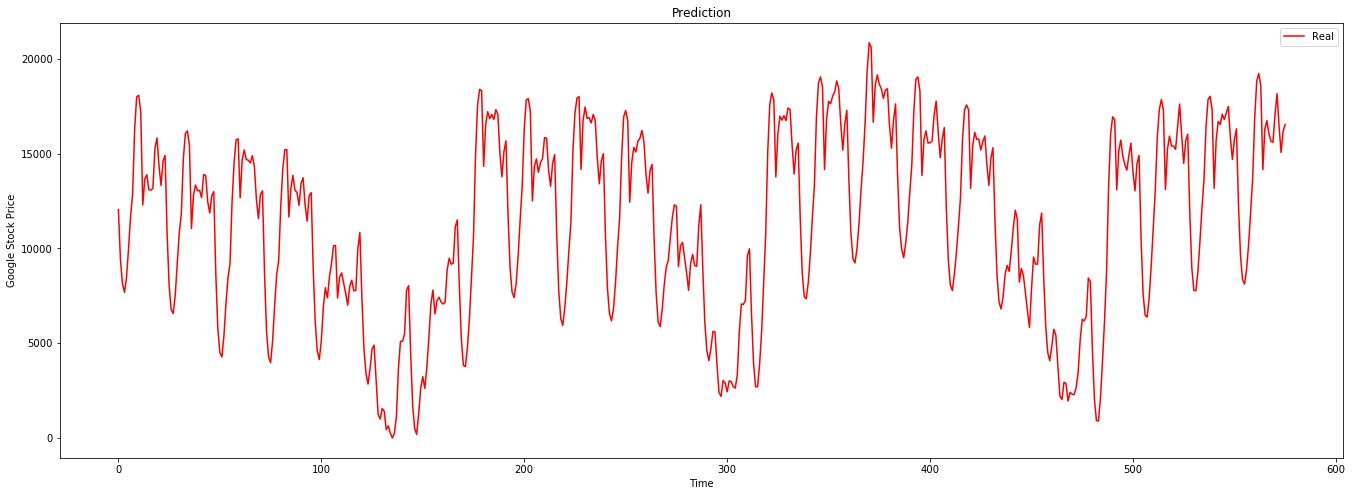

In [331]:
plt.figure(figsize=(23,8))
plt.plot(y_train, color = 'red', label = 'Real')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()